#### 공부 시간과 과외 횟수에 따른 점수 예측하기
- 목표: 공부시간으로 점수를 예측
- 데이터셋: 임의의 생성
- 피쳐/속성: 공부시간
- 타겟/라벨: 점수
- 학습방법: 지도학습-> 회귀
- 알고리즘: 선형회귀(조건: 데이터의 분포가 선형 분포)

[1] 데이터 준비


In [1]:
# 14개의 데이터셋
jumsu= [32,55,83,70,99,92,100]
hour= [1,3,4,5,7,9,10]
lesson=[0,0,2,1,2,0,1]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


Text(0, 0.5, 'jumsu')

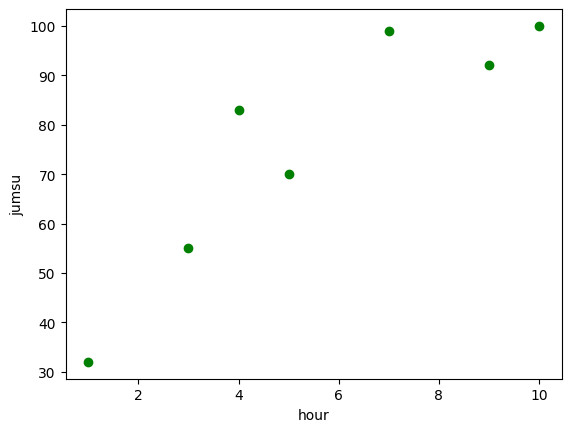

In [4]:
#현재 데이터의 분포 확인
plt.plot(hour,jumsu, 'go')
plt.xlabel('hour')
plt.ylabel('jumsu')

In [6]:
# 학습용 데이터셋 구성 => 피쳐와 타겟
dataDF=pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsuSR=pd.Series(jumsu)

In [7]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

# 객체 생성
model= LinearRegression()

In [8]:
# 학습 진행    (최대한 많은 데이터를 만족하는 기울기와 절편 찾기)
model.fit(dataDF, jumsuSR)

LinearRegression()

In [9]:
# 학습 결과
model.coef_, model.intercept_ #-> 기울기는 array(피쳐의 개수만큼 존재), 절편은 float (무조건 1개)

print(model.coef_,':',type(model.coef_),'\n', model.intercept_,':', type(model.intercept_))

[ 6.27924892 11.61819933] : <class 'numpy.ndarray'> 
 30.914299470390006 : <class 'numpy.float64'>


In [12]:
# y=ax+ b

pre_jumsu= model.coef_[0]*dataDF['Hour']+ model.coef_[1]*dataDF['Lesson'] + model.intercept_
pre_jumsu= pre_jumsu.values.reshape(-1)

real_jumsu= jumsuSR.to_numpy()

In [13]:
# 실제와 예측의 차이
pre_jumsu- real_jumsu

array([ 5.19354839, -5.24795378, -3.73230621,  3.92874338, -0.89455946,
       -4.57246028,  5.32498796])

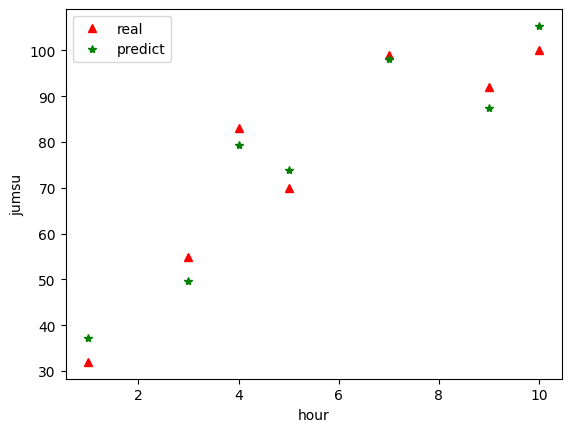

In [22]:
#현재 데이터의 분포 확인
plt.plot(dataDF['Hour'], jumsuSR, 'r^', label='real')
plt.plot(dataDF['Hour'], pre_jumsu, 'g*', label='predict')
plt.xlabel('hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

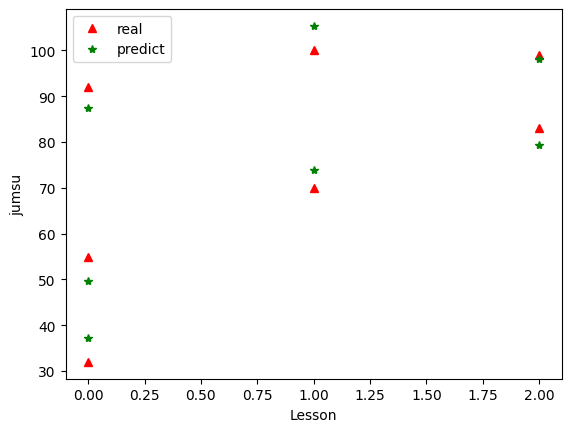

In [24]:
#현재 데이터의 분포 확인2
plt.plot(dataDF['Lesson'], jumsuSR, 'r^', label='real')
plt.plot(dataDF['Lesson'], pre_jumsu, 'g*', label='predict')
plt.xlabel('Lesson')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [15]:
model.score(dataDF, jumsuSR)

0.9649627963178466

In [17]:
# 오차 계산 함수, 즉 손실/비용함수 확인
# root_mean_squared_error-> 1.4부터 사용 가능
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [19]:
# 예측값 생성
pre_y= model.predict(dataDF)

In [20]:
# 손실/비용 계산 함수 -> 정답, 예측값 입력
mse= mean_squared_error(jumsuSR, pre_y) 
rmse= mean_squared_error(jumsuSR, pre_y, squared=False)
mae= mean_absolute_error(jumsuSR, pre_y)

# 결정계수-> 정답, 예측값 입력
r2= r2_score(jumsuSR, pre_y)
# mse(평균제곱오차), rmse(평균 제곱근 오차), mae(평균 절대오차), r2(결정계수)

In [21]:
# 손실 비용함수 도출
# -> 손실/비용 함수는 0에 가까울 수록 좋은 모델(오차에 대한 값이니까!)


print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')   #모델의 score값이 r2스코어

mse: 19.134603480294373
rmse: 4.374311772187069
mae: 4.127794208680101
r2: 0.9649627963178466
